# 使用 OOP 对森林火灾建模

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## 对森林建模

In [2]:
class Forest(object):
    def __init__(self, size=(150, 150), p_sapling=0.0025, p_lightning=5.e-6, name=None):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.forest_fires = np.zeros(self.size, dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        if name is not None:
            self.name = name
        else:
            self.name = self.__class__.__name__

    @property
    def num_cells(self):
        return self.size[0] * self.size[1]

    @property
    def tree_fraction(self):
        return self.trees.sum() / float(self.num_cells)

    @property
    def fire_fraction(self):
        return self.forest_fires.sum() / float(self.num_cells)

    def advance_one_step(self):
        self.grow_trees()
        self.start_fires()
        self.burn_trees()

    def grow_trees(self):
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True

    def start_fires(self):
        lightning_strikes = (self._rand_bool(self.p_lightning) & 
            self.trees)
        self.forest_fires[lightning_strikes] = True
        
    def burn_trees(self):
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.forest_fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.forest_fires] = False
        self.forest_fires = new_fires

    def _rand_bool(self, p):
        return np.random.uniform(size=self.trees.shape) < p

定义一个森林类之后，我们创建一个新的森林类对象：

In [3]:
forest = Forest()

显示当前的状态：

In [4]:
print forest.trees

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


In [5]:
print forest.forest_fires

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


使用 `matshow` 进行可视化：

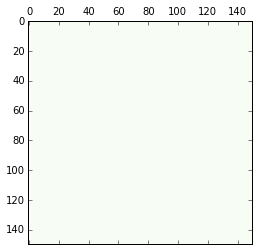

In [6]:
plt.matshow(forest.trees, cmap=plt.cm.Greens)

plt.show()

## 模拟森林生长和火灾的过程

经过一段时间：

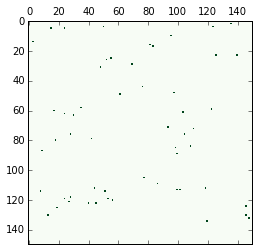

In [7]:
forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)
plt.show()

循环很长时间：

0.253111111111


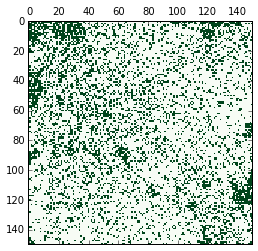

In [8]:
for i in range(500):
    forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)
print forest.tree_fraction

迭代更长时间：

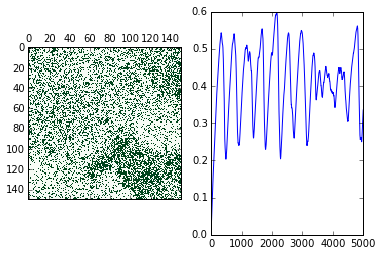

In [9]:
forest = Forest()
tree_fractions = []
for i in range(5000):
    forest.advance_one_step()
    tree_fractions.append(forest.tree_fraction)
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax0.matshow(forest.trees, cmap=plt.cm.Greens)
ax1 = fig.add_subplot(1,2,2)
ax1.plot(tree_fractions)

plt.show()